In [1]:
%pylab inline
import pandas
import seaborn

Populating the interactive namespace from numpy and matplotlib


# Load CSV into memory

In [2]:
data = pandas.read_csv('../Uber Data Analysis/uber-tlc-foil-response/uber-trip-data/uber-raw-data-apr14.csv')

In [3]:
data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [4]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,4/30/2014 23:22:00,40.7640,-73.9744,B02764
564512,4/30/2014 23:26:00,40.7629,-73.9672,B02764
564513,4/30/2014 23:31:00,40.7443,-73.9889,B02764
564514,4/30/2014 23:32:00,40.6756,-73.9405,B02764
564515,4/30/2014 23:48:00,40.6880,-73.9608,B02764


## Convert Dat/Time column type from String to Timestamp

In [5]:
data['Date/Time'] = data['Date/Time'].map(pandas.to_datetime)

In [6]:
data.tail()

,Date/Time,Lat,Lon,Base
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764


### Create a new column from day of the month

In [7]:
def get_day_of_month(date):
    return date.day

data['day_of_month'] = data['Date/Time'].map(get_day_of_month)

In [8]:
data.tail()

,Date/Time,Lat,Lon,Base,day_of_month
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30


In [9]:
def get_month_of_year(date: pandas.datetime):
    return date.month


In [10]:
data['month'] = data['Date/Time'].map(get_month_of_year)

In [11]:
data.tail()

,Date/Time,Lat,Lon,Base,day_of_month,month
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,4
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,4
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,4
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,4
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,4


In [12]:
def get_year(date: pandas.datetime):
    return date.year

data['year'] = data['Date/Time'].map(get_year)

In [13]:
data.tail()

,Date/Time,Lat,Lon,Base,day_of_month,month,year
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,4,2014
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,4,2014
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,4,2014
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,4,2014
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,4,2014


In [14]:
def get_time(date: pandas.datetime):
    return date.hour

data['time'] = data['Date/Time'].map(get_time)

data = data.drop(columns = 'time')
data.tail()

In [15]:
data.tail()

,Date/Time,Lat,Lon,Base,day_of_month,month,year,time
564511,2014-04-30 23:22:00,40.7640,-73.9744,B02764,30,4,2014,23
564512,2014-04-30 23:26:00,40.7629,-73.9672,B02764,30,4,2014,23
564513,2014-04-30 23:31:00,40.7443,-73.9889,B02764,30,4,2014,23
564514,2014-04-30 23:32:00,40.6756,-73.9405,B02764,30,4,2014,23
564515,2014-04-30 23:48:00,40.6880,-73.9608,B02764,30,4,2014,23


# Analysis

## Analyse by the day of the month

Text(0.5, 1.0, 'Frequency by DoM - uber - Apr 2014')

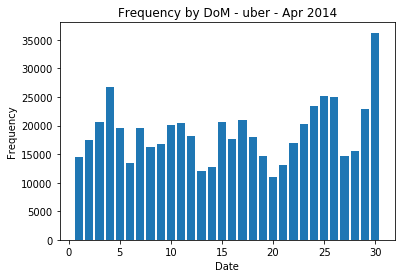

In [16]:
hist(data.day_of_month, bins=30, rwidth=.8, range=(0.5, 30.5))
xlabel('Date')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')

In [17]:
for key, rows in data.groupby('day_of_month'):
    print((key, len(rows)))


(1, 14546)
(2, 17474)
(3, 20701)
(4, 26714)
(5, 19521)
(6, 13445)
(7, 19550)
(8, 16188)
(9, 16843)
(10, 20041)
(11, 20420)
(12, 18170)
(13, 12112)
(14, 12674)
(15, 20641)
(16, 17717)
(17, 20973)
(18, 18074)
(19, 14602)
(20, 11017)
(21, 13162)
(22, 16975)
(23, 20346)
(24, 23352)
(25, 25095)
(26, 24925)
(27, 14677)
(28, 15475)
(29, 22835)
(30, 36251)


In [18]:
def count_rows(rows):
    return len(rows)

by_date = data.groupby('day_of_month').apply(count_rows)
by_date

day_of_month
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

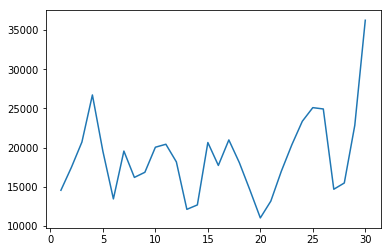

In [19]:
plot(by_date)

In [20]:
by_date_sorted = by_date.sort_values()
by_date_sorted

day_of_month
20    11017
13    12112
14    12674
21    13162
6     13445
1     14546
19    14602
27    14677
28    15475
8     16188
9     16843
22    16975
2     17474
16    17717
18    18074
12    18170
5     19521
7     19550
10    20041
23    20346
11    20420
15    20641
3     20701
17    20973
29    22835
24    23352
26    24925
25    25095
4     26714
30    36251
dtype: int64

''

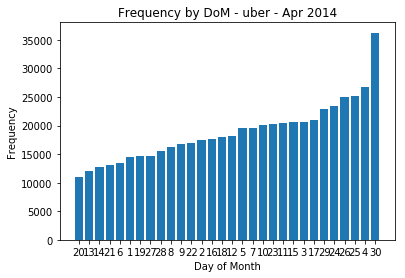

In [21]:
bar(range(1, 31), by_date_sorted)
xticks(range(1,31), by_date_sorted.index)
xlabel('Day of Month')
ylabel('Frequency')
title('Frequency by DoM - uber - Apr 2014')
;

###  Analyse by hour

In [22]:
data.head()

,Date/Time,Lat,Lon,Base,day_of_month,month,year,time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,4,2014,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,4,2014,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,4,2014,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,4,2014,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,4,2014,0


(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <a list of 24 Patch objects>)

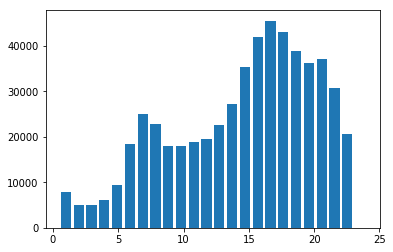

In [23]:
hist(data.time, bins=24, rwidth=.8, range=(.5, 24))

## Cross Analysis

In [28]:
# how many rides per hour for each day

In [31]:
by_cross = data.groupby('day_of_month time'.split()).apply(count_rows).unstack()

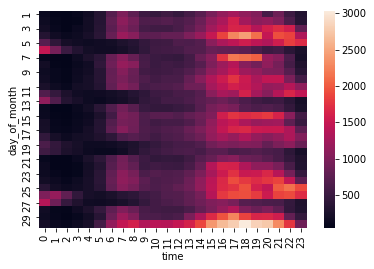

In [32]:
seaborn.heatmap(by_cross)

## By lat lng

''

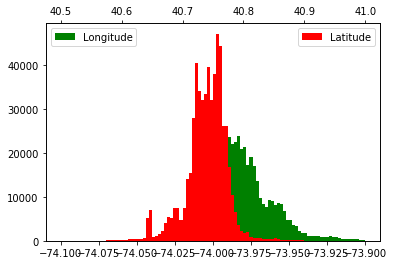

In [38]:
# Not meaningful

hist(data["Lon"], bins = 100, range = (-74.1, -73.9), color='g', label = "Longitude")

legend(loc = "upper left")
twiny()
hist(data["Lat"], bins = 100, range = (40.5, 41), color='r', label = "Latitude")

legend(loc = "best")
;

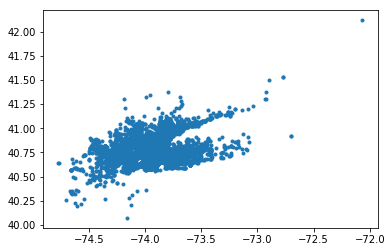

In [40]:
# Not meaningful
plot(data['Lon'], data['Lat'], '.')

In [41]:
data.head()

,Date/Time,Lat,Lon,Base,day_of_month,month,year,time
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,4,2014,0
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,4,2014,0
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,4,2014,0
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,4,2014,0
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,4,2014,0


## By Base

In [55]:
by_base = data.groupby('Base').apply(count_rows)

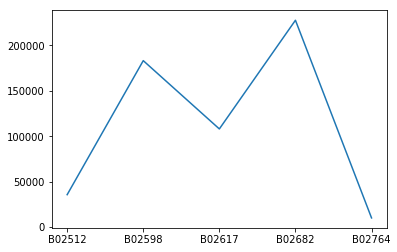

In [59]:
plot(by_base)